In [1]:
import tensorflow as tf
from tensorflow.keras import layers 
import matplotlib.pylab as plt
import tensorflow_datasets as tfds

### Importazione del Dataset creazione dati train e test corrispettivamente a 0.9 e 0.1 

In [2]:
ds = tfds.load(
    'cats_vs_dogs',
    split=['train[:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

example = ds[1].splits['train[:90%]'].num_examples

### Visualizzazione di 4 esempi del dataset con le etichette 

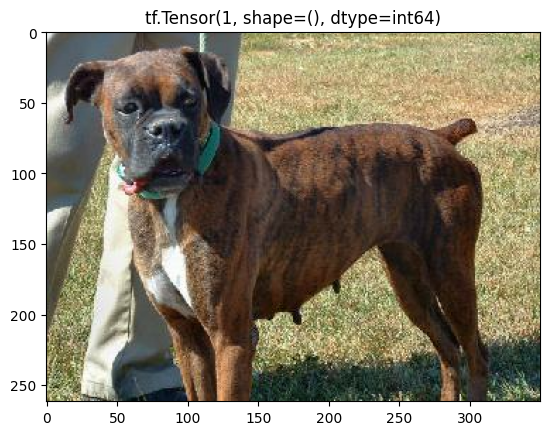

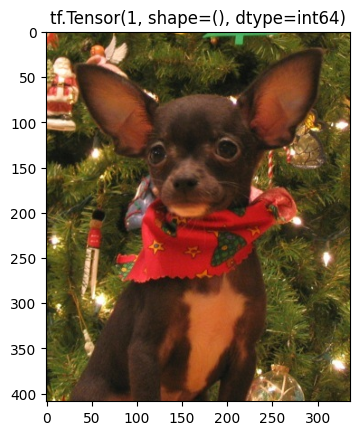

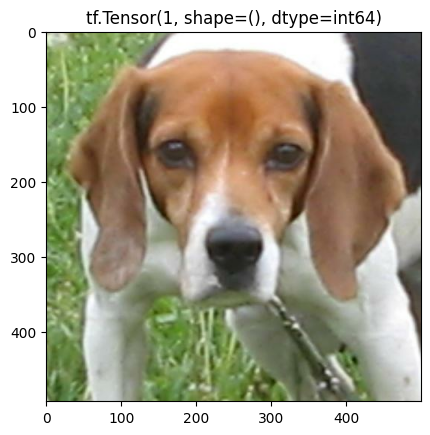

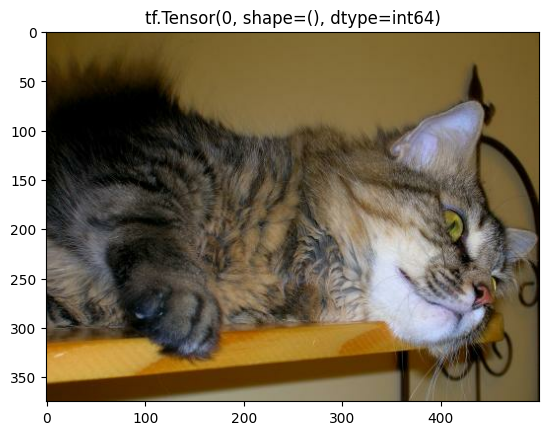

In [3]:
for image, label in ds[0][0].take(4):
    plt.figure()
    plt.title(str(label))
    plt.imshow(image)

### Creazione di funzione per il preprocessing dei dati

In [4]:
image_size = 64
def preprocessing(image, label):
    image = tf.cast(image, tf.float32)
    image = image/255.0
    image = tf.image.resize(image, (image_size, image_size))
    return image, label

### Preprocessing dei dati, mescolamento dei dati per tutto il dataset

In [5]:
batch_size = 32 
steps_for_epochs = example// batch_size

ds_train = ds[0][0].map(preprocessing).shuffle(example).repeat().batch(batch_size)
ds_test = ds[0][1].map(preprocessing).batch(batch_size)

### Costruzione dell architettura delle CNN senza Global Pooling e compilazione modello 

In [6]:
model = tf.keras.Sequential(name='Conv2D_Dense')
model.add(layers.Conv2D(32, (3, 3), input_shape=(image_size, image_size, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))


model.compile(optimizer= tf.keras.optimizers.Adam(),
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "Conv2D_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 62, 62, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 64)       

### Addestramento 

In [7]:
history = model.fit(
    ds_train,
    steps_per_epoch=steps_for_epochs,
    epochs=25,
    validation_data=ds_test
)

Epoch 1/25
654/654 [==============================] - 338s 484ms/step - loss: 0.6327 - accuracy: 0.7080 - val_loss: 0.4803 - val_accuracy: 0.7631
Epoch 2/25
654/654 [==============================] - 268s 409ms/step - loss: 0.4229 - accuracy: 0.8054 - val_loss: 0.4277 - val_accuracy: 0.8035
Epoch 3/25
654/654 [==============================] - 238s 363ms/step - loss: 0.3513 - accuracy: 0.8438 - val_loss: 0.4287 - val_accuracy: 0.7966
Epoch 4/25
654/654 [==============================] - 217s 332ms/step - loss: 0.2944 - accuracy: 0.8733 - val_loss: 0.3732 - val_accuracy: 0.8409
Epoch 5/25
654/654 [==============================] - 196s 300ms/step - loss: 0.2457 - accuracy: 0.8946 - val_loss: 0.4615 - val_accuracy: 0.7941
Epoch 6/25
654/654 [==============================] - 187s 285ms/step - loss: 0.1843 - accuracy: 0.9242 - val_loss: 0.4917 - val_accuracy: 0.8031
Epoch 7/25
654/654 [==============================] - 181s 277ms/step - loss: 0.1468 - accuracy: 0.9409 - val_loss: 0.4976 -

### Costruzione architettura modello CNN con Global Pooling e compilazione modello. Come possiamo vedere grazie all'utilizzo del global pooling abbiamo una forte diominuzione dei parametri 

In [8]:
model_gp = tf.keras.Sequential(name='Conv2D_GlobalMaxPooling')
model_gp.add(layers.Conv2D(32, (3, 3), input_shape=(image_size, image_size, 3)))
model_gp.add(layers.BatchNormalization())
model_gp.add(layers.Activation('relu'))
model_gp.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_gp.add(layers.Conv2D(64, (3, 3)))
model_gp.add(layers.BatchNormalization())
model_gp.add(layers.Activation('relu'))
model_gp.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_gp.add(layers.Conv2D(128, (3, 3)))
model_gp.add(layers.BatchNormalization())
model_gp.add(layers.Activation('relu'))
model_gp.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_gp.add(layers.GlobalMaxPool2D())
model_gp.add(layers.BatchNormalization())
model_gp.add(layers.Dense(1))
model_gp.add(layers.Activation('sigmoid'))

model_gp.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_gp.summary()

Model: "Conv2D_GlobalMaxPooling"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_4 (Bat  (None, 62, 62, 32)        128       
 chNormalization)                                                
                                                                 
 activation_5 (Activation)   (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 29, 29,

### Addestramento del modello. Come possiamo vedere dall'addestramento abbiamo gli stessi risultati in accuratezza

In [9]:
history_gp = model_gp.fit(
    ds_train,
    steps_per_epoch=steps_for_epochs,
    epochs=25,
    validation_data=ds_test
)

Epoch 1/25
654/654 [==============================] - 333s 475ms/step - loss: 0.5519 - accuracy: 0.7168 - val_loss: 0.7223 - val_accuracy: 0.6238
Epoch 2/25
654/654 [==============================] - 254s 389ms/step - loss: 0.4215 - accuracy: 0.8061 - val_loss: 0.4494 - val_accuracy: 0.7971
Epoch 3/25
654/654 [==============================] - 222s 339ms/step - loss: 0.3461 - accuracy: 0.8493 - val_loss: 0.4041 - val_accuracy: 0.8259
Epoch 4/25
654/654 [==============================] - 192s 293ms/step - loss: 0.2927 - accuracy: 0.8734 - val_loss: 0.3805 - val_accuracy: 0.8383
Epoch 5/25
654/654 [==============================] - 181s 276ms/step - loss: 0.2368 - accuracy: 0.9028 - val_loss: 0.2940 - val_accuracy: 0.8672
Epoch 6/25
654/654 [==============================] - 175s 267ms/step - loss: 0.1984 - accuracy: 0.9186 - val_loss: 0.3976 - val_accuracy: 0.8319
Epoch 7/25
654/654 [==============================] - 170s 260ms/step - loss: 0.1705 - accuracy: 0.9313 - val_loss: 0.8549 -

### Illustrazione dei risultati di addestramento tra modello senza Global Pooling e modello con Global Pooling

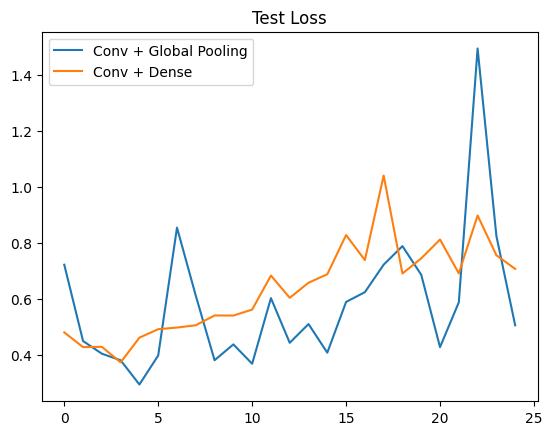

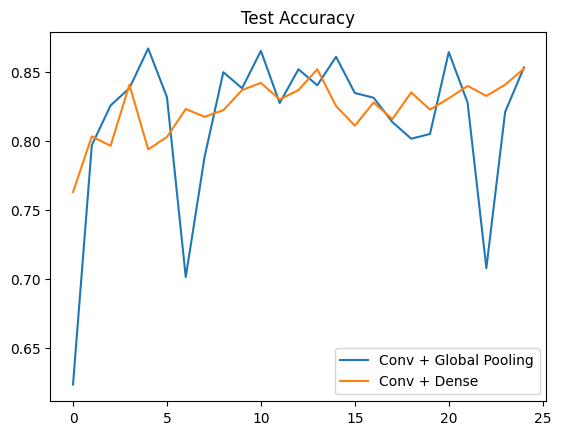

In [10]:
plt.plot(history_gp.history['val_loss'], label='Conv + Global Pooling')
plt.plot(history.history['val_loss'], label='Conv + Dense')
plt.title('Test Loss')
plt.legend()
plt.show()

plt.plot(history_gp.history['val_accuracy'], label='Conv + Global Pooling')
plt.plot(history.history['val_accuracy'], label='Conv + Dense')
plt.title('Test Accuracy')
plt.legend()
plt.show()